In [1]:
import os
import glob
import re
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pwd

'/Users/jeffliao/Desktop/dsc180a/project/notebooks'

In [5]:
apps = [i for i in os.listdir('../data/smali') if i[0] != '.']

In [13]:
# get all filenames with .smali using glob recursive=True
num_smali = list()
for app in apps:
    smali = glob.glob('../data/smali/%s/**/*.smali'%app, recursive=True)
    num_smali.append(len(smali))

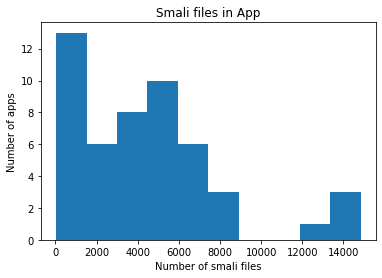

In [35]:
pd.Series(num_smali).plot(kind='hist')
plt.title('Smali files in App')
plt.xlabel('Number of smali files');
plt.ylabel('Number of apps');
plt.savefig('./numSmali_per_app.png')

In [27]:
pd.Series(num_smali).describe()

count       50.000000
mean      4404.840000
std       3791.097953
min         37.000000
25%       1257.750000
50%       3842.000000
75%       6061.250000
max      14829.000000
dtype: float64

In [28]:
smali[0]

'../data/smali/business-433/smali_classes2/okio/Okio$1.smali'

In [16]:
def find_api_calls(iterable, var):
    '''
    Find api calls in a list of texts and save the api calls into var
    input: iterable (list of texts), var (list to save to)
    '''
    for i in iterable:
        if('invoke-' in i and 'method' not in i):
            api_call = re.search('L.+', i).group(0)[1:]
            var.append(api_call)

In [17]:
calls = list()
for path in smali:
    with open(path) as f:
        # find api calls
        find_api_calls(f, calls)

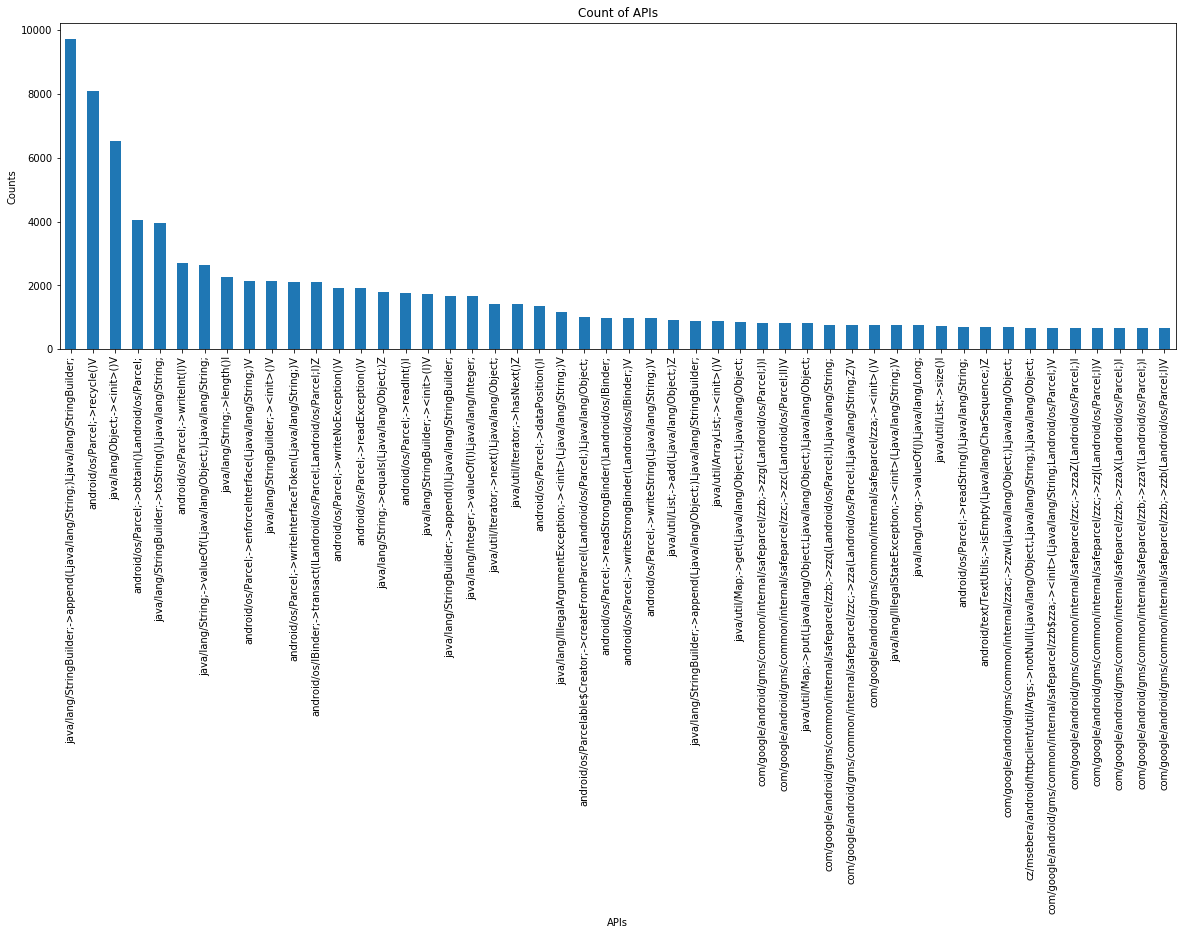

In [18]:
fig= plt.figure(figsize=(20,6))
pd.Series(calls).value_counts().iloc[:50].plot(kind='bar');

plt.title('Count of APIs');
plt.xlabel('APIs');
plt.ylabel('Counts');
plt.savefig('./candy_crush.png')

In [38]:
pd.Series(calls).value_counts().iloc[:50]

java/lang/Object;-><init>()V                                                                                                                5242
java/lang/StringBuilder;->append(Ljava/lang/String;)Ljava/lang/StringBuilder;                                                               4554
java/lang/StringBuilder;->toString()Ljava/lang/String;                                                                                      1791
java/lang/String;->valueOf(Ljava/lang/Object;)Ljava/lang/String;                                                                            1068
java/lang/StringBuilder;-><init>()V                                                                                                         1058
java/lang/String;->length()I                                                                                                                1022
java/lang/String;->equals(Ljava/lang/Object;)Z                                                                                    

In [5]:
calls = dict()
for path in smali:
    with open(path) as f:
        for line in f:
            # find api calls
            if('invoke' in line):
                api = re.search('\/{1}\w+;', line)
                if(api):
                    api = api.group(0)[1:-1]
                    try:
                        calls[api] += 1
                    except:
                        calls[api] = 1

In [6]:
{k: v for k, v in sorted(calls.items(), key=lambda item: item[1], reverse=True)}

{'StringBuilder': 9612,
 'Object': 6797,
 'String': 6656,
 'Parcel': 4244,
 'Bundle': 2494,
 'View': 2096,
 'ArrayList': 2067,
 'List': 2021,
 'Iterator': 1529,
 'JSONObject': 1396,
 'Context': 1374,
 'Log': 1334,
 'SafeParcelReader': 1304,
 'Integer': 1279,
 'Map': 1179,
 'SafeParcelWriter': 1024,
 'zzfm': 1015,
 'Intent': 1006,
 'Class': 966,
 'zzdtt': 903,
 'Math': 823,
 'RecyclerView': 706,
 'Preconditions': 638,
 'zzaxa': 605,
 'zzbae': 597,
 'ByteBuffer': 593,
 'Set': 564,
 'Boolean': 555,
 'IllegalArgumentException': 548,
 'zzdnh': 535,
 'zztv': 529,
 'zzk': 523,
 'IBinder': 518,
 'Handler': 514,
 'zzdpn': 508,
 'Long': 501,
 'zzdtr': 501,
 'Utility': 498,
 'zzfo': 497,
 'zzvz': 482,
 'zzdqy': 471,
 'zzxj': 466,
 'Activity': 465,
 'Drawable': 457,
 'zzdoa': 457,
 'HashMap': 442,
 'zzdtg': 433,
 'Uri': 425,
 'System': 420,
 'zzyr': 416,
 'CharSequence': 412,
 'Unsafe': 412,
 'PrintWriter': 411,
 'zzbha': 411,
 'IllegalStateException': 407,
 'TypedArray': 405,
 'TextUtils': 392,
 

In [20]:
G = nx.Graph()

In [21]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [9]:
G.add_edge(1, 2)
G.add_edge(1, 3)

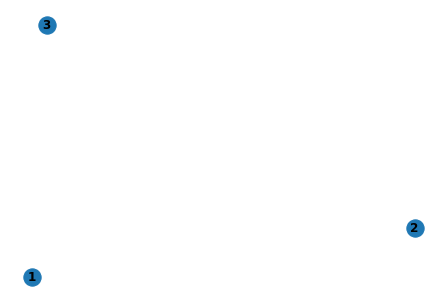

In [22]:
nx.draw(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

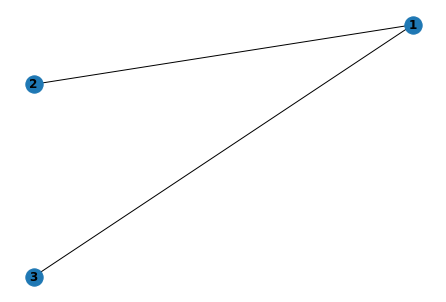

In [11]:
G.add_node(1)

nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

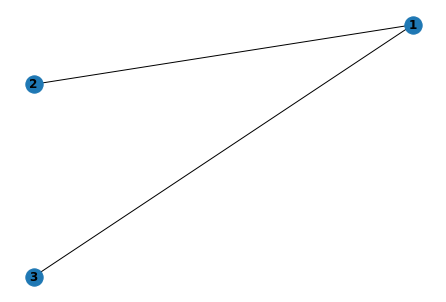

In [12]:
G.add_edge(1, 2)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [13]:
G.degree

DegreeView({1: 2, 2: 1, 3: 1})

In [14]:
G.add_edge(1, 2)
G.degree

DegreeView({1: 2, 2: 1, 3: 1})

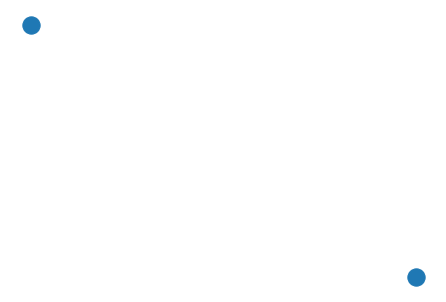

In [42]:
relation = nx.Graph()
# relation.add_node('a')
relation.add_nodes_from(['a','b'])
pos=nx.spring_layout(relation)
nx.draw(relation, pos)
# nx.draw_shell(relation, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [17]:
# with open(smali[0]) as f:
#     doc = f.read()  
#     the_class = re.search('\.class.+;{1}', doc).group(0)[8:-1]
#     the_super = re.search('\.super.+;{1}', doc).group(0)[8:-1]
#     relation.add_node(node)

# the_class
# the_super

In [37]:
# path are the smali files
for path in smali:
    with open(path) as f:
        # read the entire doc
        doc = f.read()
        # obtain the class and super part
        the_class = re.search('\.class.+;{1}', doc).group(0)[8:-1]
        the_super = re.search('\.super.+;{1}', doc).group(0)[8:-1]
        # both class and super are a "class", add to node
        relation.add_node(the_class)
        relation.add_node(the_super)
        # class inherits super so add an edge
        relation.add_edge(the_class, the_super)

NameError: name 'relation' is not defined

In [19]:
relation.nodes

NodeView(('bolts/WebViewAppLinkResolver$2$1', 'android/webkit/WebViewClient', 'inal Lbolts/Task$14', 'java/lang/Object', 'inal Lbolts/Task$4', 'inal Lbolts/Task$6', 'ublic Lbolts/CancellationTokenSource', 'ublic final Lbolts/Bolts', 'inal Lbolts/Task$2', 'bolts/Task$12', 'bolts/BoltsExecutors$ImmediateExecutor', 'bolts/Task$10', 'bolts/CancellationTokenSource$1', 'ublic Lbolts/AppLink', 'bolts/WebViewAppLinkResolver$2$2', 'inal Lbolts/Task$7', 'ublic Lbolts/Task$TaskCompletionSource', 'inal Lbolts/Task$5', 'ynthetic Lbolts/AndroidExecutors$1', 'inal Lbolts/Task$15', 'bolts/Task$11', 'inal Lbolts/Task$1', 'ublic final Lbolts/AppLinks', 'ublic Lbolts/Capture', 'ublic Lbolts/AppLinkNavigation', 'inal Lbolts/AndroidExecutors', 'ublic interface abstract Lbolts/Continuation', 'ublic final enum Lbolts/AppLinkNavigation$NavigationResult', 'java/lang/Enum', 'bolts/Task$13', 'bolts/AndroidExecutors$UIThreadExecutor', 'bolts/Task$3', 'ynthetic Lbolts/BoltsExecutors$1', 'inal Lbolts/BoltsExecutors

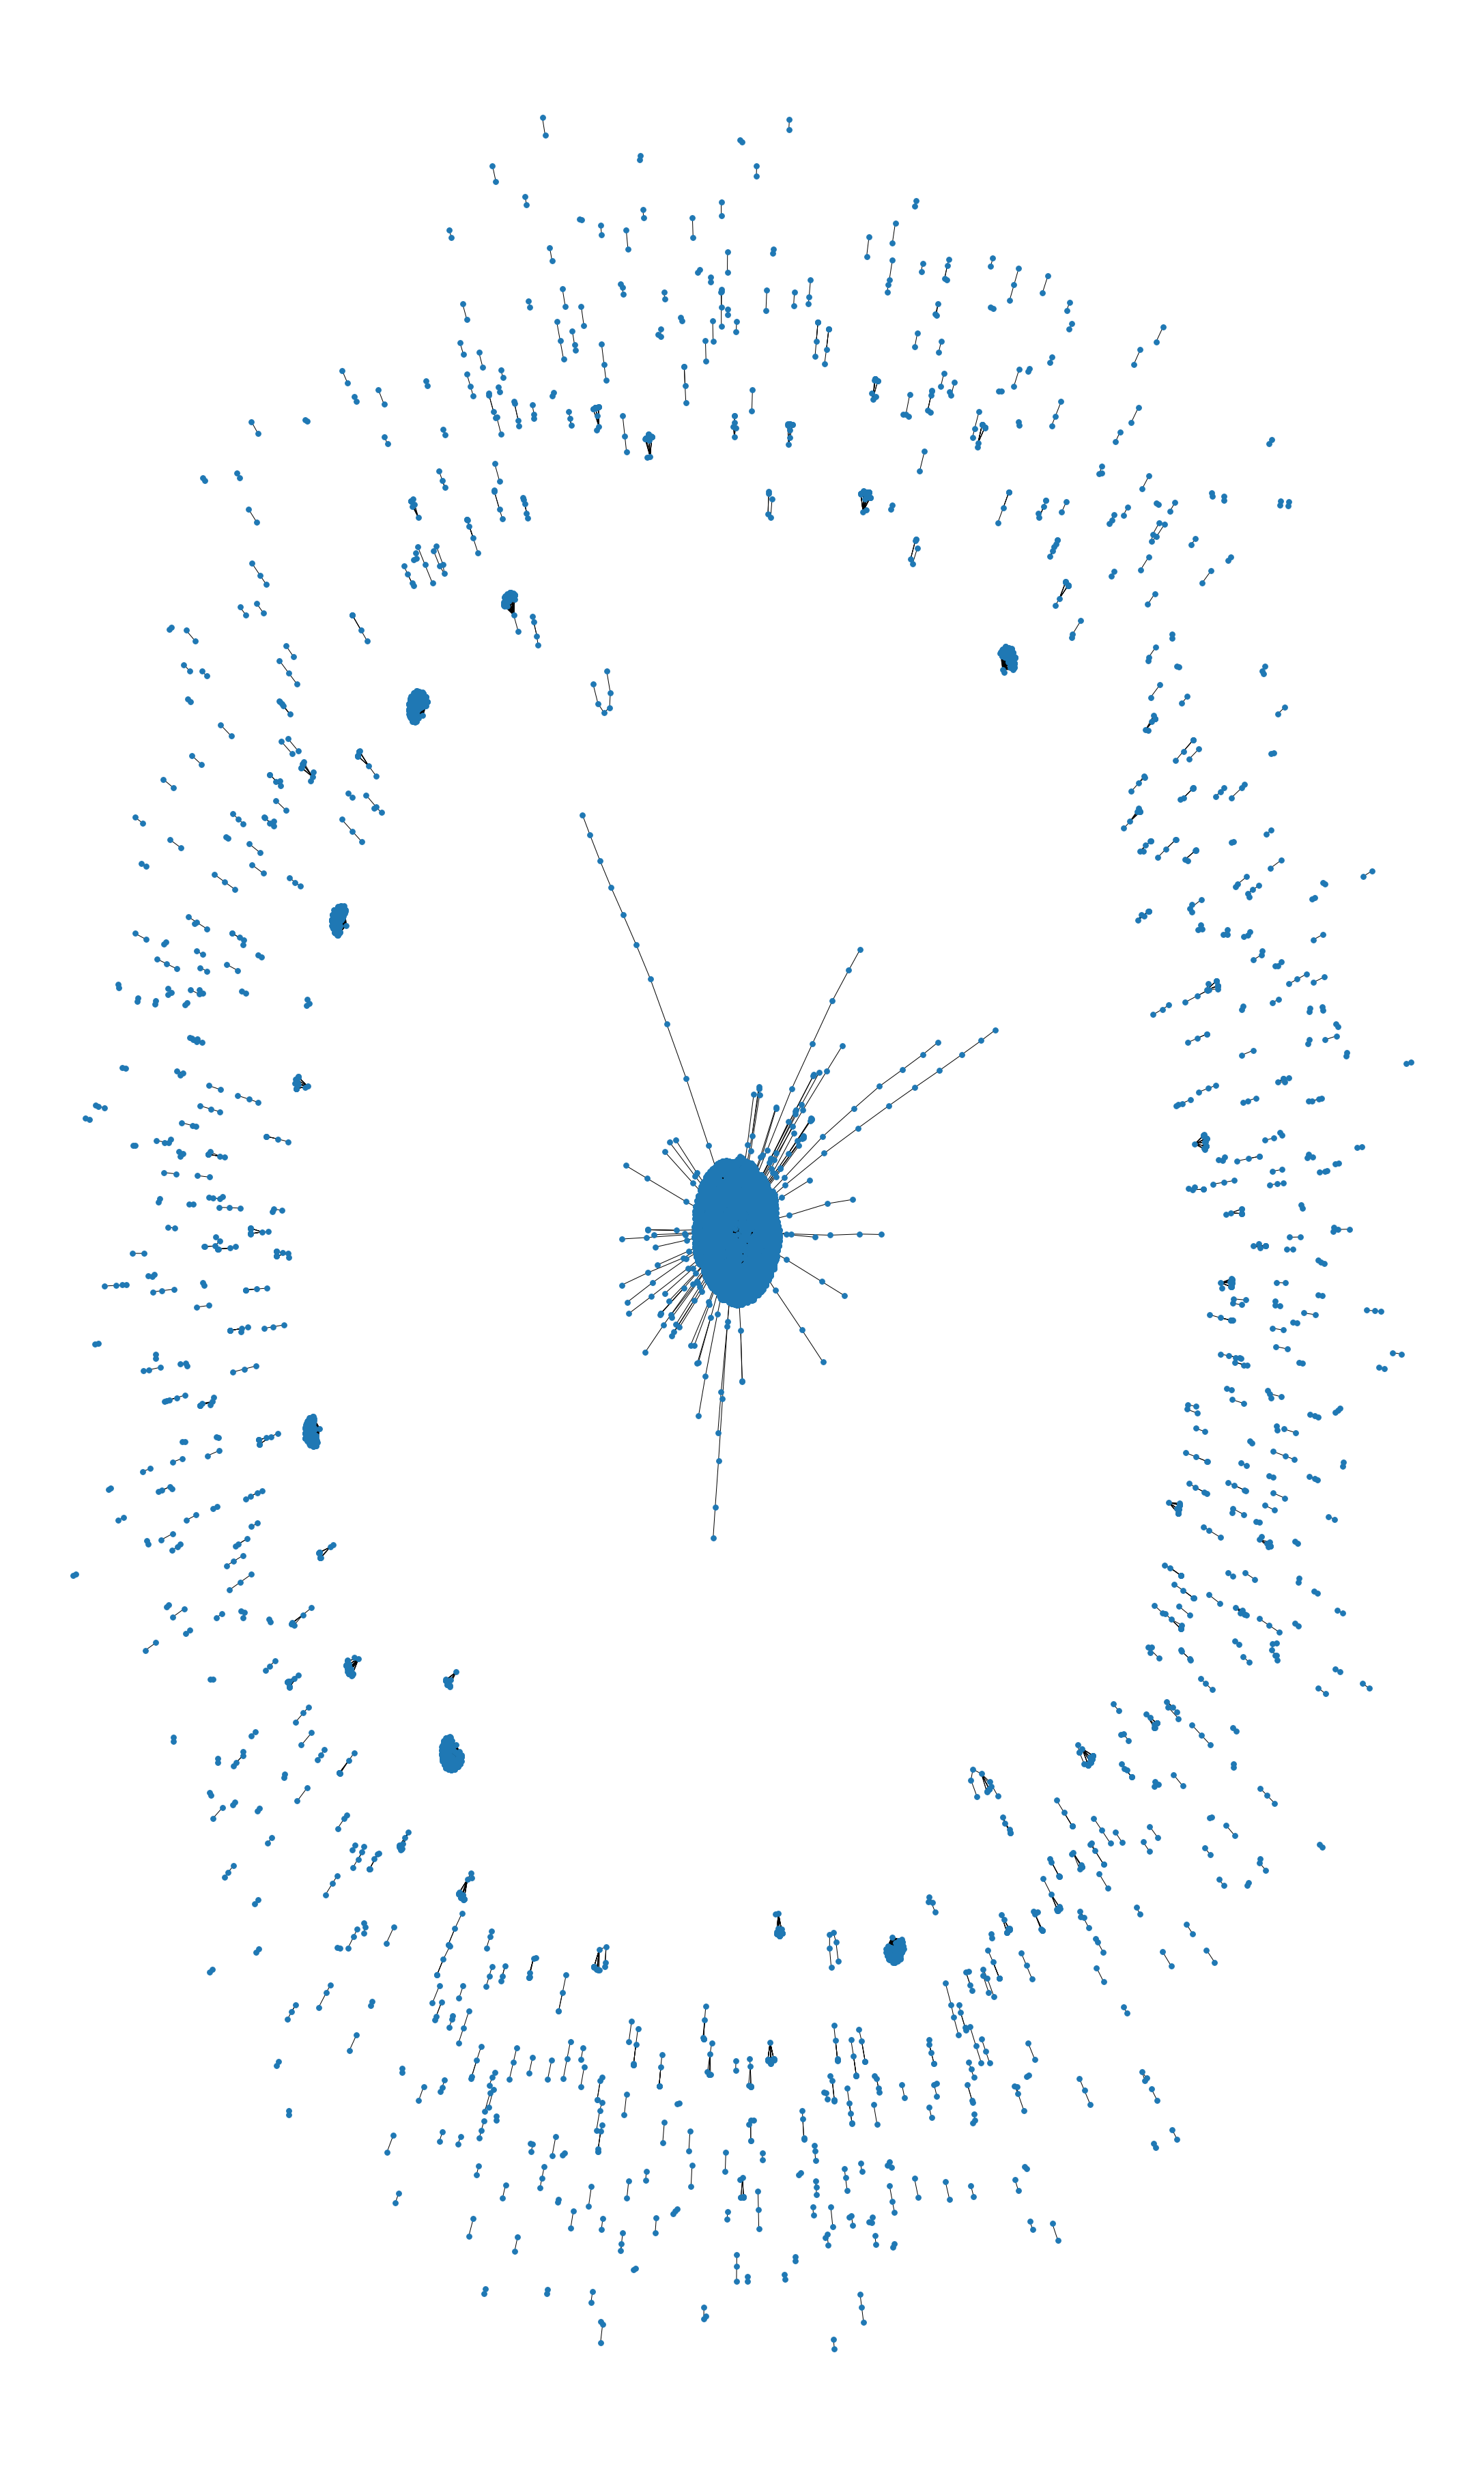

In [14]:
plt.figure(figsize=(30,50)) 
nx.draw(relation, node_size=60)
plt.savefig('candy_crush_relations.png')

In [26]:
pd.DataFrame(relation.degree).sort_values(by=1, ascending=False)

,0,1
3,java/lang/Object,6403
28,java/lang/Enum,132
2230,com/google/android/gms/common/internal/safepar...,114
2936,com/google/android/gms/internal/ads/zzdoa,86
2912,com/google/android/gms/internal/ads/zzdoa$zza,85
...,...,...
3282,ublic final Lcom/google/android/gms/internal/a...,1
3281,inal synthetic Lcom/google/android/gms/interna...,1
3280,inal synthetic Lcom/google/android/gms/interna...,1
3279,inal synthetic Lcom/google/android/gms/interna...,1


In [29]:
relation.remove_node('java/lang/Object')

In [36]:
plt.figure(figsize=(20,40)) 
nx.draw(relation, node_size=60)
plt.savefig('candy_crush_relations.png')

NameError: name 'relation' is not defined

<Figure size 1440x2880 with 0 Axes>